We will visualize the likelihood calculation for the coin example. 
We want to answer: For each possible value of p, how likely would I get this exact data?

The MLE estimate is the number of heads divided by the total number of flips.
MLE uses ONLY the observed data, it ignores any prior beliefs.

10 times flipped the coin
Actual flips: [1 0 0 1 1 1 1 0 1 0]
Number of heads: 6
Number of tails: 4
Maximum Likelihood Estimate (MLE): p = 0.60


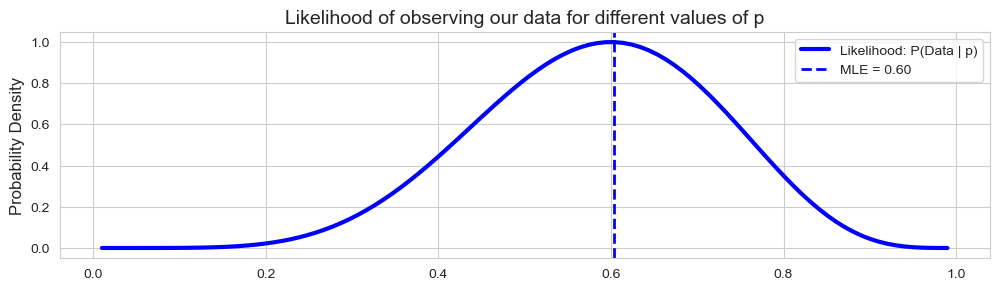

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import seaborn as sns

# Set the style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Let's use a real-world scenario: a biased coin
np.random.seed(42)  # For reproducibility

# Suppose we have a coin and we want to know its probability of heads, and we think it is probably a fair coin (p = 0.5)

# Let's say the true probability of heads is 0.7 (but this is not known in advance)
true_p = 0.7

# We flip the coin 10 times and observe the outcomes
n_flips = 10
coin_flips = np.random.binomial(1, true_p, size=n_flips)
n_heads = np.sum(coin_flips)
n_tails = n_flips - n_heads


print(f"{n_flips} times flipped the coin")
print(f"Actual flips: {coin_flips}")
print(f"Number of heads: {n_heads}")
print(f"Number of tails: {n_tails}")


# The likelihood function P(Data | p) tells how likely the observed data is
# for different values of p
p_range = np.linspace(0.01, 0.99, 100)

# Calculation of likelihood for each value of p
likelihood = np.zeros_like(p_range)
for i, p in enumerate(p_range):
    # For each possible p, calculate how likely we'd see exactly 7 heads in 10 flips
    # Likelihood = p^heads * (1-p)^tails
    likelihood[i] = p**n_heads * (1-p)**n_tails

# Normalization of likelihood to maximum of 1 for easier visualization
likelihood_normalized = likelihood / np.max(likelihood)

#  Maximum Likelihood Estimate (MLE)
mle = p_range[np.argmax(likelihood)]

print(f"Maximum Likelihood Estimate (MLE): p = {mle:.2f}")

# likelihood plot
plt.subplot(3, 1, 1)
plt.plot(p_range, likelihood_normalized, 'b-', linewidth=3, label=f'Likelihood: P(Data | p)')
plt.axvline(x=mle, color='b', linestyle='--', linewidth=2, label=f'MLE = {mle:.2f}')
plt.ylabel('Probability Density', fontsize=12)
plt.title('Likelihood of observing our data for different values of p', fontsize=14)
plt.legend()

We will now look how the MAP estimate incrporates prior beliefs. The prior represents our beliefs before seeing any data
We use a Beta distribution as our prior (please read a bit about the Beta distribution, and read carefully the comments in the code below).


Our prior belief is that the coin is fair. We model this as a Beta distribution Beta(5,5), which peaks at p=0.5.
The parameters 5,5 can be thought of as having previously seen 5 heads and 5 tails.

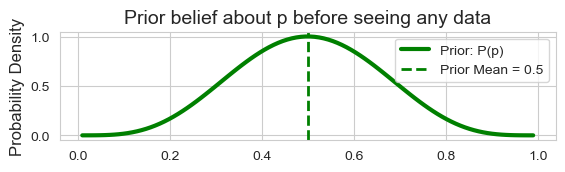

In [33]:
# Incorporating Prior Knowledge: The prior represents our beliefs before seeing any data
# We use a Beta distribution as our prior
# Beta(5,5) represents a belief centered at p=0.5 (fair coin)
alpha_prior = 5
beta_prior = 5

# Calculate the prior distribution
prior = beta.pdf(p_range, alpha_prior, beta_prior)


# Plot the prior
plt.subplot(3, 1, 2)
plt.plot(p_range, prior / np.max(prior), 'g-', linewidth=3, label=f'Prior: P(p)')
plt.axvline(x=0.5, color='g', linestyle='--', linewidth=2, label='Prior Mean = 0.5')
plt.ylabel('Probability Density', fontsize=12)
plt.title('Prior belief about p before seeing any data', fontsize=14)
plt.legend()

Now we will calculate the posterior (updated prob. distribution AFTER seeing the data: it combines the likelihood and prior) and the MAP estimate. For a Beta prior and Bernoulli likelihood, the posterior is Beta(alpha + heads, beta + tails). 




POSTERIOR & MAP APPROACH
--------------------------------------------------
The posterior combines the prior belief with the observed data.
Our posterior is Beta(11, 9)
Maximum A Posteriori (MAP) Estimate: p = 0.56


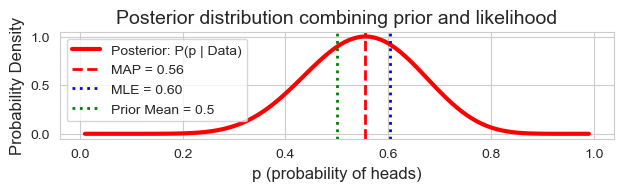

In [34]:
# Calculating Posterior and MAP 
# The posterior combines the likelihood and prior
alpha_posterior = alpha_prior + n_heads
beta_posterior = beta_prior + n_tails

# Calculate the posterior distribution
posterior = beta.pdf(p_range, alpha_posterior, beta_posterior)

# Find the MAP (Maximum A Posteriori) estimate
# For Beta distribution, MAP = (alpha - 1) / (alpha + beta - 2)
map_estimate = (alpha_posterior - 1) / (alpha_posterior + beta_posterior - 2)

print("\n\nPOSTERIOR & MAP APPROACH")
print("-" * 50)
print("The posterior combines the prior belief with the observed data.")
print(f"Our posterior is Beta({alpha_posterior}, {beta_posterior})")
print(f"Maximum A Posteriori (MAP) Estimate: p = {map_estimate:.2f}")


# Plot the posterior and MAP
plt.subplot(3, 1, 3)
plt.plot(p_range, posterior / np.max(posterior), 'r-', linewidth=3, label=f'Posterior: P(p | Data)')
plt.axvline(x=map_estimate, color='r', linestyle='--', linewidth=2, label=f'MAP = {map_estimate:.2f}')
plt.axvline(x=mle, color='b', linestyle=':', linewidth=2, label=f'MLE = {mle:.2f}')
plt.axvline(x=0.5, color='g', linestyle=':', linewidth=2, label='Prior Mean = 0.5')
plt.xlabel('p (probability of heads)', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.title('Posterior distribution combining prior and likelihood', fontsize=14)
plt.legend()


plt.tight_layout()
plt.savefig('map_estimation_visualization.png')
plt.show()

With very small samples (2-5 flips), the MAP estimate is (generally) closer to the prior (0.5).
As sample size increases, the MAP estimate moves toward the MLE and true value (0.7).
 With large samples (200+ flips), the prior has negligible influence.The posterior distribution becomes narrower (more certain) with more data. The MLE fluctuates more with small samples, the MAP estimaiton is more stable.



Imagine you're in a courtroom:

MLE is like only considering the evidence (data) presented in court. It ignores any prior knowledge about the defendant.
In our example, MLE says p = 0.6 based solely on seeing 6 heads in 10 flips.

Prior is like your preconceived idea about the defendant. Before seeing any evidence, you might think they're probably innocent (or fair, p=0.5). MAP is like forming your final opinion after considering both:
 - The evidence presented in court (the data)
 - Your prior knowledge about the defendant (the prior).
In our example, MAP says p = 0.56, which is between the MLE (0.6) and our prior (0.5).

As we collect more data (flip the coin more times), the MAP estimate gets closer to the MLE.
This is because with more evidence, our prior beliefs matter less.



Sample size: 2
Heads: 1, Tails: 1
MLE = 0.5000
MAP = 0.5000
Distance from prior: 0.4091
Distance from MLE: 0.0000

Sample size: 5
Heads: 5, Tails: 0
MLE = 1.0000
MAP = 0.6923
Distance from prior: 0.2168
Distance from MLE: 0.3077

Sample size: 10
Heads: 7, Tails: 3
MLE = 0.7000
MAP = 0.6111
Distance from prior: 0.2980
Distance from MLE: 0.0889

Sample size: 20
Heads: 16, Tails: 4
MLE = 0.8000
MAP = 0.7143
Distance from prior: 0.1948
Distance from MLE: 0.0857

Sample size: 50
Heads: 37, Tails: 13
MLE = 0.7400
MAP = 0.7069
Distance from prior: 0.2022
Distance from MLE: 0.0331

Sample size: 200
Heads: 137, Tails: 63
MLE = 0.6850
MAP = 0.6779
Distance from prior: 0.2312
Distance from MLE: 0.0071


<Figure size 1200x800 with 0 Axes>

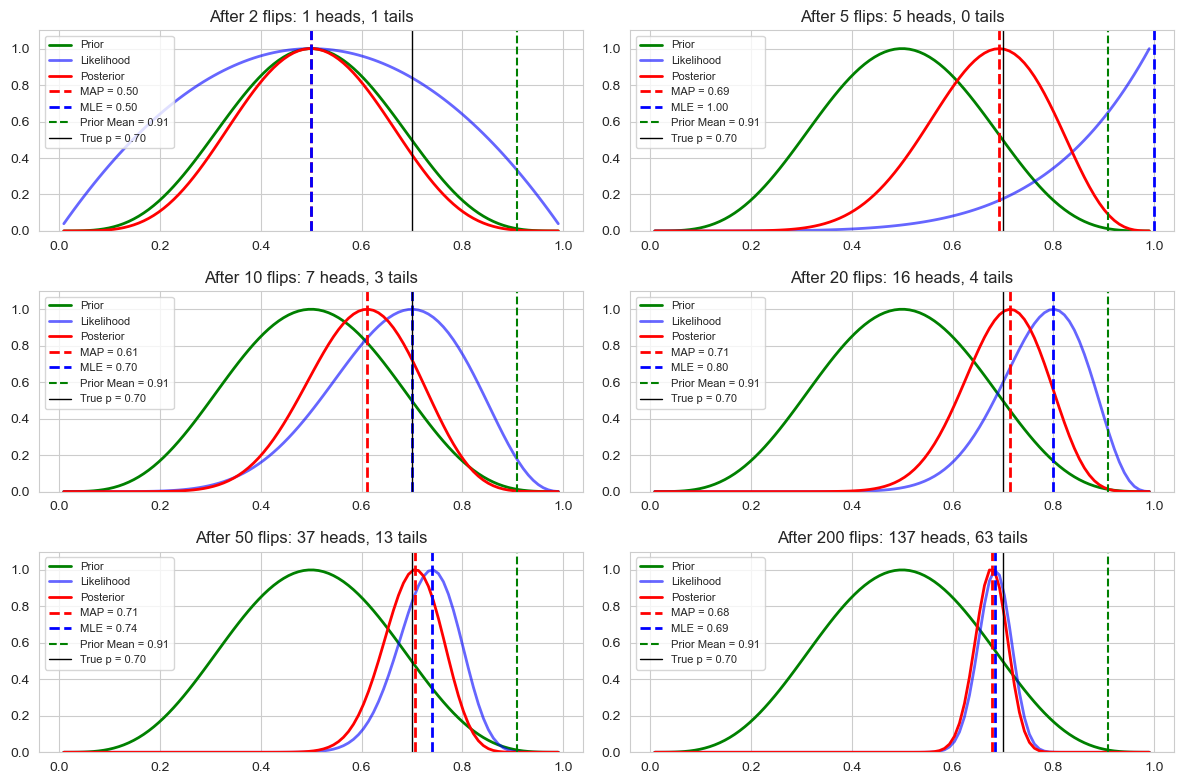

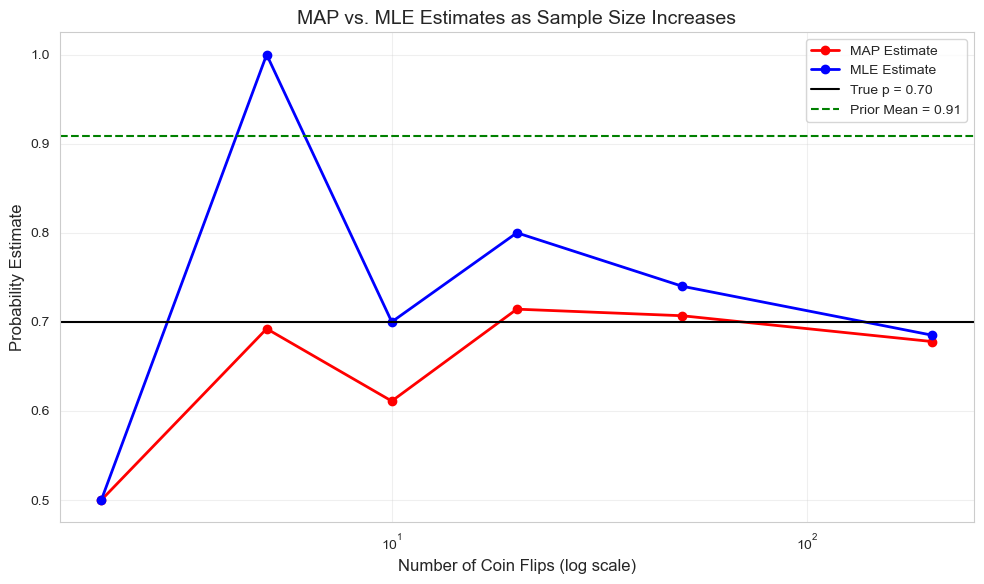

In [35]:

num_flips_list = [2, 5, 10, 20, 50, 200]
plt.figure(figsize=(12, 8))

# Keep track of MAP and MLE values for each sample size
map_values = []
mle_values = []
sample_sizes = []

# Plot the prior distribution first for reference
prior_dist = beta.pdf(p_range, alpha_prior, beta_prior)
plt.figure(figsize=(12, 8))

for i, num_flips in enumerate(num_flips_list):
    # Set random seed for reproducibility
    np.random.seed(42 + i)  # Different seed for each sample size
    
    # Generate coin flips with true_p = 0.7
    flips = np.random.binomial(1, true_p, size=num_flips)
    heads = np.sum(flips)
    tails = num_flips - heads
    
    # Calculate MLE
    mle_estimate = heads / num_flips
    
    # Calculate MAP with the same prior
    alpha_post = alpha_prior + heads
    beta_post = beta_prior + tails
    map_est = (alpha_post - 1) / (alpha_post + beta_post - 2)
    
    # Store values for tracking
    map_values.append(map_est)
    mle_values.append(mle_estimate)
    sample_sizes.append(num_flips)
    
    # Calculate posterior
    posterior = beta.pdf(p_range, alpha_post, beta_post)
    
    # Create subplot
    plt.subplot(3, 2, i+1)
    
    # Plot the prior, likelihood, and posterior
    # Scale down the prior and likelihood for better visualization
    # Since we're only interested in their shapes
    plt.plot(p_range, prior_dist / np.max(prior_dist), 'g-', linewidth=2, label='Prior')
    
    # Calculate likelihood function for visualization
    likelihood = np.zeros_like(p_range)
    for j, p in enumerate(p_range):
        likelihood[j] = p**heads * (1-p)**tails
    plt.plot(p_range, likelihood / np.max(likelihood), 'b-', linewidth=2, alpha=0.6, label='Likelihood')
    
    plt.plot(p_range, posterior / np.max(posterior), 'r-', linewidth=2, label='Posterior')
    
    # Add vertical lines for estimates
    plt.axvline(x=map_est, color='r', linestyle='--', linewidth=2, label=f'MAP = {map_est:.2f}')
    plt.axvline(x=mle_estimate, color='b', linestyle='--', linewidth=2, label=f'MLE = {mle_estimate:.2f}')
    plt.axvline(x=prior_mean, color='g', linestyle='--', linewidth=1.5, label=f'Prior Mean = {prior_mean:.2f}')
    plt.axvline(x=true_p, color='k', linestyle='-', linewidth=1, label=f'True p = {true_p:.2f}')
    
    plt.title(f'After {num_flips} flips: {heads} heads, {tails} tails', fontsize=12)
    plt.legend(fontsize=8, loc='upper left')
    plt.ylim(0, 1.1)
    
    # Print statistics
    print(f"\nSample size: {num_flips}")
    print(f"Heads: {heads}, Tails: {tails}")
    print(f"MLE = {mle_estimate:.4f}")
    print(f"MAP = {map_est:.4f}")
    print(f"Distance from prior: {abs(map_est - prior_mean):.4f}")
    print(f"Distance from MLE: {abs(map_est - mle_estimate):.4f}")

plt.tight_layout()
plt.savefig('map_evolution_with_data.png')

# Create a plot showing how MAP and MLE converge as sample size increases
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, map_values, 'r-o', linewidth=2, label='MAP Estimate')
plt.plot(sample_sizes, mle_values, 'b-o', linewidth=2, label='MLE Estimate')
plt.axhline(y=true_p, color='k', linestyle='-', linewidth=1.5, label=f'True p = {true_p:.2f}')
plt.axhline(y=prior_mean, color='g', linestyle='--', linewidth=1.5, label=f'Prior Mean = {prior_mean:.2f}')

plt.xscale('log')  # Log scale for x-axis to better show behavior with small samples
plt.xlabel('Number of Coin Flips (log scale)')
plt.ylabel('Probability Estimate')
plt.title('MAP vs. MLE Estimates as Sample Size Increases')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('map_mle_convergence.png')

